In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from IPython import display
from skimage.feature import hog, local_binary_pattern

In [2]:
def show_image(image):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 2)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

In [3]:
def main(action):
    try:
        while(True):
            ret, frame = cap.read()
            image = action(frame)
            show_image(image)
            display.clear_output(wait=True)
    except KeyboardInterrupt:
        pass
    finally:
        cap.release()

In [116]:
cap = cv2.VideoCapture(0)

In [5]:
def color_image(image):
    return image

In [6]:
def grayscale_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [7]:
def hog_image(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
    return hog_image

In [8]:
def lbp_image(image):
    image = grayscale_image(image)
    radius = 2
    n_points = 8 * radius
    lbp_image = local_binary_pattern(image, n_points, radius)
    return lbp_image

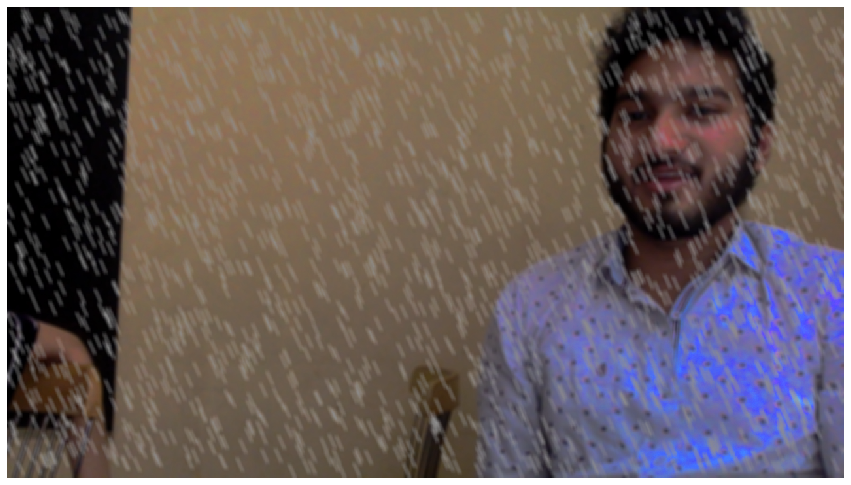

In [117]:
main(add_rain)

In [14]:
import numpy as np

In [144]:
def generate_random_lines(imshape,slant,drop_length):    
    drops=[]    
    for i in range(5000): 
        ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))    
    return drops            
def add_rain(image):        
    imshape = image.shape    
    slant_extreme=10
    slant= np.random.randint(-slant_extreme, slant_extreme)     
    drop_length=20    
    drop_width=2
    drop_color=(200,200,200) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
    image= cv2.blur(image,(7, 7)) 
    ## rainy view are blurry        
    brightness_coefficient = 0.7
    ## rainy days are usually shady     
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    ## Conversion to HLS    
    image_HLS[:,:,1] = image_HLS[:,:,1] * brightness_coefficient 
    ## scale pixel values down for channel 1(Lightness)    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    ## Conversion to RGB    
    return image_RGB

In [145]:
image = cv2.imread('/Users/swg/Desktop/34.jpg')

In [146]:
rainy_image = add_rain(image)

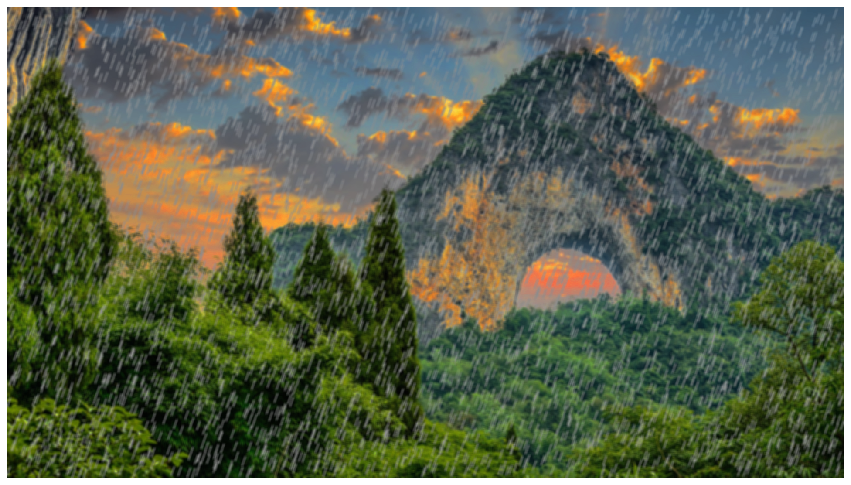

In [147]:
show_image(rainy_image)

In [190]:
def cartoonize(img):
    # 1) Edges
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # 2) Color
    color = cv2.bilateralFilter(img, 5, 200, 200)

    # 3) Cartoon
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    cartoon = cv2.blur(cartoon,(6, 6))
    return cartoon

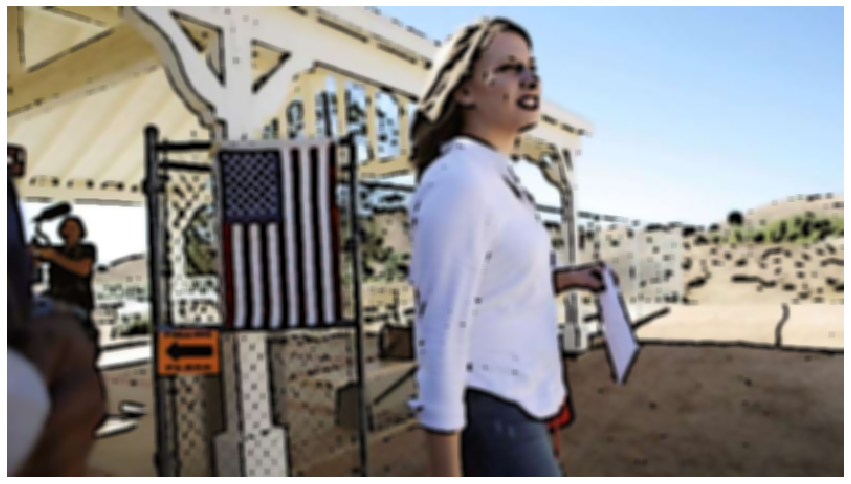

In [191]:
image = cv2.imread('/Users/swg/Desktop/a.jpg')
image = cartoonize(image)
show_image(image)